In [2]:
import sys, os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
outpath = os.path.join(parent_dir, 'out')
mantid_path = os.path.join (parent_dir, 'mantid')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [4]:
coli = os.path.join (mantid_path, 'SNAP_43682_masked.nxs')
noColi = os.path.join (mantid_path, 'clampCell_Si_exp_masked.nxs')

In [5]:
import reduce_nexasdata_using_mantid as red
import normalization_by_area as nrm

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
step = 0.01

In [9]:
binning = [0.5, step, 4.]



In [10]:
d_coli, I_coli, error_coli = red.mantid_reduction(coli, binning)
d_NoColi, I_NoColi, error_NoColi = red.mantid_reduction(noColi, binning)


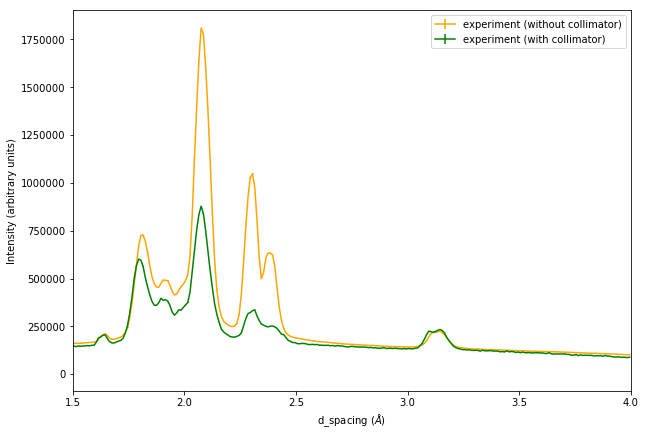

In [17]:
plt.figure(figsize=(10,7))
plt.errorbar (d_NoColi, I_NoColi, error_NoColi, color='orange' ,label= "experiment (without collimator)")
plt.errorbar (d_coli,I_coli*18.6,error_coli, color='green', label="experiment (with collimator)")


# plt.errorbar (d_simulation,I_simulation, color='orange', label="simulation (with collimator)")

plt.legend()
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel ('Intensity (arbitrary units)')
plt.xlim (1.5,4)
plt.show()